## IMporting Data 

In [1]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])


In [2]:
! mamba install pandas ==1.3.3
! mamba install numpy=1.21.2
! mamba install scipy =1.7.1-y
! mamba install seaborn=0.9.0-y

<class 'AttributeError'>: module 'pexpect' has no attribute 'TIMEOUT'

In [3]:
import pandas as pd
import numpy as np 

In [4]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [5]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'

In [6]:
await download(path, 'auto_csv')
filename = 'auto_csv'

In [8]:
df = pd.read_csv(filename)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Analyzing Individual Feature Patterns Using Visualization

In [9]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

## Question #1

In [14]:
# what is the dta type of the column paek-rpm

df['peak-rpm'].dtypes

dtype('float64')

In [16]:
# Calculation of the correlation 

df['peak-rpm'].corr

<bound method Series.corr of 0      5000.0
1      5000.0
2      5000.0
3      5500.0
4      5500.0
        ...  
196    5400.0
197    5300.0
198    5500.0
199    4800.0
200    5400.0
Name: peak-rpm, Length: 201, dtype: float64>

## Question #2

In [17]:
## Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.
## Hint: if you would like to select those columns, use the following syntax: 
##df[['bore','stroke','compression-ratio','horsepower']]

df[['bore','stroke','compression-ratio','horsepower']].corr

<bound method DataFrame.corr of      bore  stroke  compression-ratio  horsepower
0    3.47    2.68                9.0       111.0
1    3.47    2.68                9.0       111.0
2    2.68    3.47                9.0       154.0
3    3.19    3.40               10.0       102.0
4    3.19    3.40                8.0       115.0
..    ...     ...                ...         ...
196  3.78    3.15                9.5       114.0
197  3.78    3.15                8.7       160.0
198  3.58    2.87                8.8       134.0
199  3.01    3.40               23.0       106.0
200  3.78    3.15                9.5       114.0

[201 rows x 4 columns]>

In [18]:
# Continuous Numerical Variables
# these types are float64 or int64. 
# Use these variable types to create visualizations

## Positive linear relationship

(0.0, 53438.78117422656)

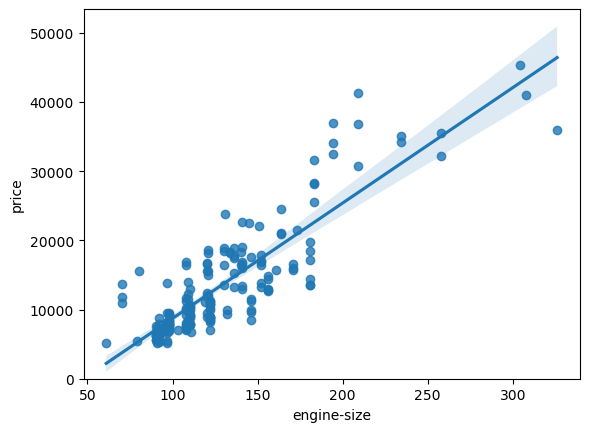

In [27]:
# Engine size as potential predictor variable of price

sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

In [34]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

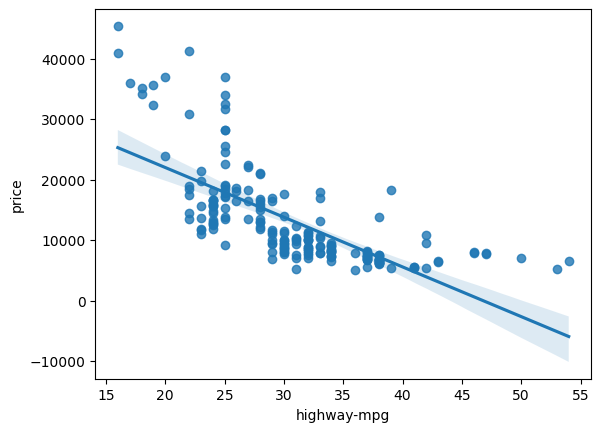

In [30]:
# Weak linear Relationship

sns.regplot(x='highway-mpg', y='price', data=df)

In [33]:
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


## Question #3

In [35]:
#Find the correlation between x="stroke" and y="price".
#Hint: if you would like to select those columns, use the following syntax: 
#df[["stroke","price"]].

df[['stroke','price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


<AxesSubplot:xlabel='stroke', ylabel='price'>

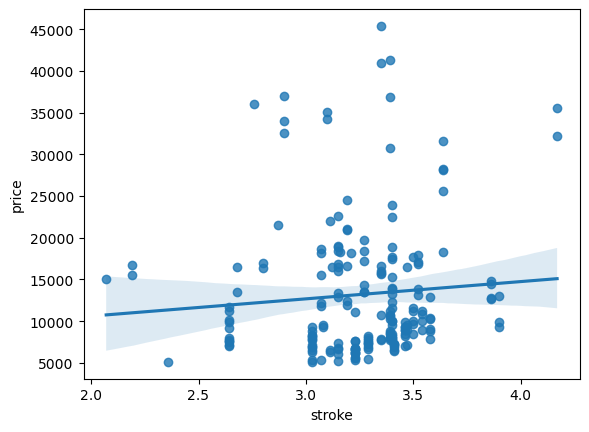

In [37]:
# Given the correlation results between "price" and "stroke", do you expect a 
# linear relationship?
# Verify your results using the function "regplot()"

sns.regplot(x= 'stroke', y ='price', data=df)
# weak correlation betwen the two variables.

## Categorical Variables

<AxesSubplot:xlabel='body-style', ylabel='price'>

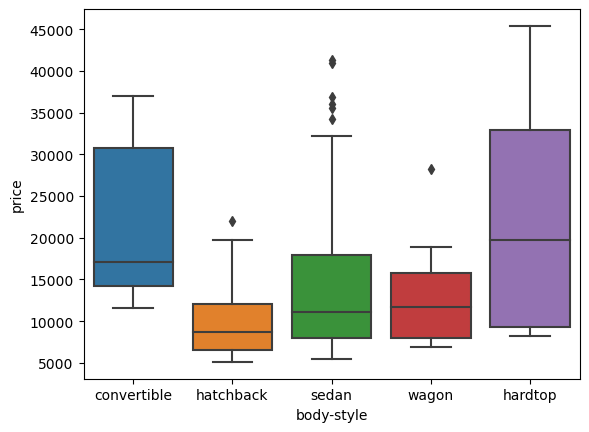

In [38]:
# LOOKING at relationshps between attributes

sns.boxplot(x='body-style', y= 'price', data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

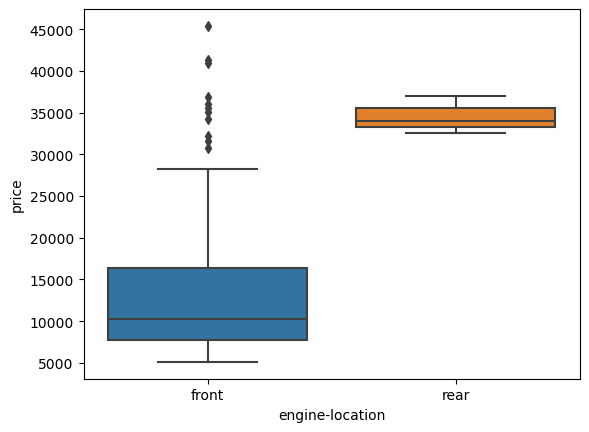

In [39]:
sns.boxplot(x='engine-location', y='price', data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

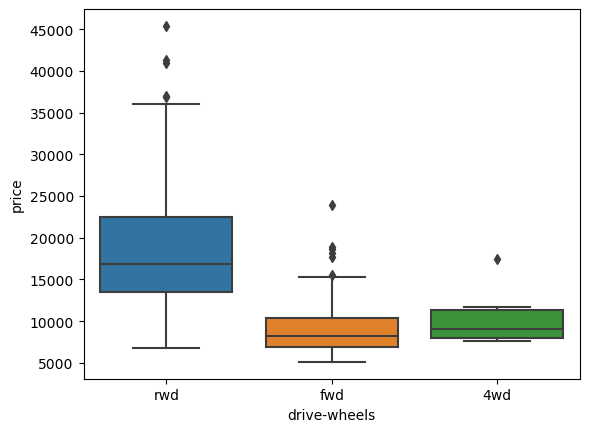

In [41]:
sns.boxplot(x='drive-wheels', y= 'price', data=df)

## Descriptive Statistical Analysis

In [42]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [47]:
df.describe(include='object')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


## Value Counts 

----- Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Only works in panda series not in panda dataframes.

In [48]:
df[['drive-wheels']].value_counts()

drive-wheels
fwd             118
rwd              75
4wd               8
dtype: int64

In [50]:
df[['drive-wheels']].value_counts().to_frame()

,0
drive-wheels,
fwd,118
rwd,75
4wd,8


In [59]:
## Let's repeat the above steps but save the results to the dataframe 
## "drive_wheels_counts" and rename the column 'drive-wheels' to 'value_counts'.


drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace= True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [60]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [58]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location':'value_counts'}, inplace = True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


## Basics Of Grouping 

The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.


In [62]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [63]:
## Grouping drive-wheels, price, body-style

df_group_one = df[['drive-wheels', 'body-style', 'price']]

In [65]:
# calculate the avg price for each category 
# on avg rwd are more expensive and the other two are almost the same in price

df_group_one = df_group_one.groupby(['drive-wheels'], as_index = False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [68]:
# grouping results
# think of these as pivot tables 

df_gptest = df[['drive-wheels', 'body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'], as_index = False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


## Question #4

In [70]:
# Use the "groupby" function to find the average
# "price" of each car based on"body-style".

df_group_two = df[['body-style', 'price']]
df_group_two = df_group_two.groupby(['body-style'], as_index = False).mean()
df_group_two

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


## Using a heat Map for visualization

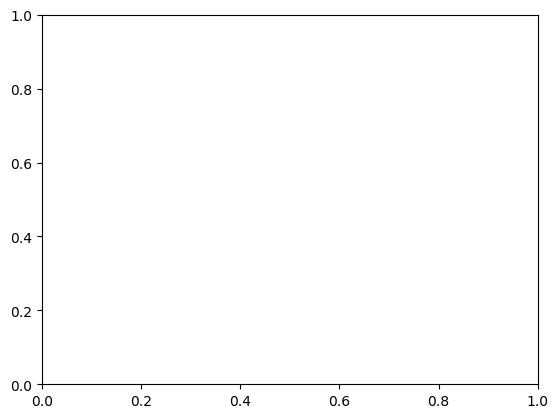

<class 'TypeError'>: Image data of dtype object cannot be converted to float

In [76]:
plt.pcolor(df_group_one, cmap='RdBu')
plt.colorbar()
plt.show()

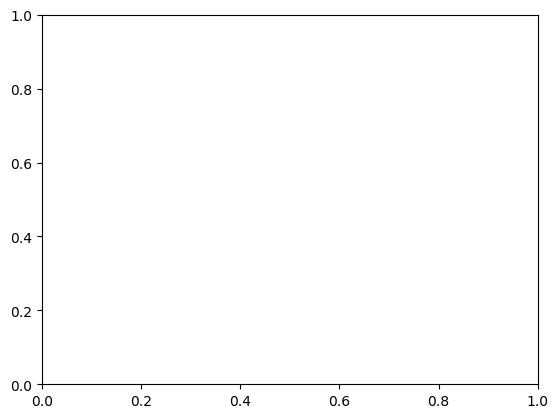

<class 'TypeError'>: Image data of dtype object cannot be converted to float

In [78]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_test1, cmap='RdBu')

#label names
row_labels = grouped_test1.columns.levels[1]
col_labels = grouped_test1.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_test1.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_test1.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [79]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


## Correlation and Causation

In [81]:
from scipy import stats

In [83]:
# Wheel-Base vs Price

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655085  with a P-value of P = 8.076488270732243e-20


In [85]:
# horsepower vs price

pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print( 'Peasrson Correlation Coefficient is', pearson_coef, 'with a p-value of p =', p_value)

Peasrson Correlation Coefficient is 0.8095745670036559 with a p-value of p = 6.369057428260101e-48


In [87]:
# length vs price

pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print( 'Pearson Correlation and Coeefficient is', pearson_coef, 'with a p value of p =', p_value)

Pearson Correlation and Coeefficient is 0.6906283804483643 with a p value of p = 8.01647746615853e-30


In [92]:
# width vs price

pearson_coef,p_value = stats.pearsonr(df['width'], df['price'])
print( 'Pearson Correlation Coefficient is', pearson_coef, 'with a P-value of p=',p_value)


Pearson Correlation Coefficient is 0.7512653440522666 with a P-value of p= 9.200335510483739e-38


In [94]:
# curb weight vs price

pearson_coef,p_value = stats.pearsonr(df['curb-weight'],df['price'])
print( 'Pearson correlation Coefficient is', pearson_coef, 'with a p-value of p =', p_value)


Pearson correlation Coefficient is 0.8344145257702845 with a p-value of p = 2.189577238893816e-53


In [97]:
# engine size vs price

pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print('Pearson Correlation Coefficient is', pearson_coef, 'with a p-value of p =',p_value)


Pearson Correlation Coefficient is 0.8723351674455188 with a p-value of p = 9.265491622196808e-64


In [98]:
# bore vs price

pearson_coef,p_value = stats.pearsonr(df['bore'],df['price'])
print('Pearson Correlation Coefficient is', pearson_coef, 'with a p-value of p =', p_value) 
                                                            


Pearson Correlation Coefficient is 0.54315538326266 with a p-value of p = 8.049189483935489e-17


In [103]:
# city mpg vs price

pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print('Pearson Correlation Coefficient is', pearson_coef, 'with a p-value of p =', p_value)


Pearson Correlation Coefficient is -0.6865710067844684 with a p-value of p = 2.3211320655672453e-29


In [102]:
# highway mpg vs price

pearson_coef,p_value = stats.pearsonr(df['highway-mpg'],df['price'])
print('Pearson correlation Coefficient is', pearson_coef, 'with a p-value of p =', p_value)


Pearson correlation Coefficient is -0.7046922650589534 with a p-value of p = 1.749547114447437e-31


## Analysis of Variance

F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

P-value: P-value tells how statistically significant our calculated score value is.

In [104]:
grouped_test2 = df_gptest[[ 'drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [105]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [108]:
#We can obtain the values of the method group using the method "get_group".

grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [111]:
# We can use the function 'f_oneway' in the module 
#'stats' to obtain the F-test score and P-value.

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])
print('ANOVA results: f=', f_val, ', p=', p_val)                             

ANOVA results: f= 130.5533160959111 , p= 2.2355306355677845e-23


In [113]:
# 4wd and rwd

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])
print( 'ANOVA results', f_val, ', p=', p_val)

ANOVA results 8.580681368924756 , p= 0.004411492211225333


In [114]:
# 4wd and fwd

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])
print( 'ANOVA RESULTS', f_val, ', p=',p_val)                                                                                                    

ANOVA RESULTS 0.665465750252303 , p= 0.41620116697845655
